<a href="https://colab.research.google.com/github/MariaNikolaeva2028/Time-series-/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обоснование: на основе данных временного ряда необходимо выполнить экспоненциальное сглаживание(двумя способами) с коэффициентом сглаживания 0,15. Построить линейный тренд, а также расчитать коэффициент детерминации. Проект является учебным и направлен на отработку навыков работы с временными рядами. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка данных. Выполнен сдвиг индексов: нумерация будет начинаться с 1




In [2]:
data_series = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/fdbd99c2d4e15140789f7a234a0da395/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021_3+type@asset+block/task5_529088.csv')
data_series.index += 1
data_series

,y
1,10
2,27
3,23
4,17
5,18
...,...
96,168
97,167
98,157
99,167


Создание функции для экспоненциального сглаживания, с коэффициентом сглаживания 0,15.

In [3]:
def smooth_data_exponentially(series, alpha):
  result = [series[0]]
  for i in range(1, len(series)):
    result.append(alpha * series[i] + (1 - alpha) * result[i - 1])
  return result

Добавление столбца smothed_data, в которой будут записаны сглаженные данные.

In [4]:
data_series['smoothed_data'] = smooth_data_exponentially(data_series['y'].to_list(), 0.15)
data_series

,y,smoothed_data
1,10,10.000000
2,27,12.550000
3,23,14.117500
4,17,14.549875
5,18,15.067394
...,...,...
96,168,147.978953
97,167,150.832110
98,157,151.757293
99,167,154.043699


Визуализация фактических данных и  данных, полученных после экспоненциального сглаживания, с коэффициентом сглаживания 0,15.

<function matplotlib.pyplot.show(*args, **kw)>

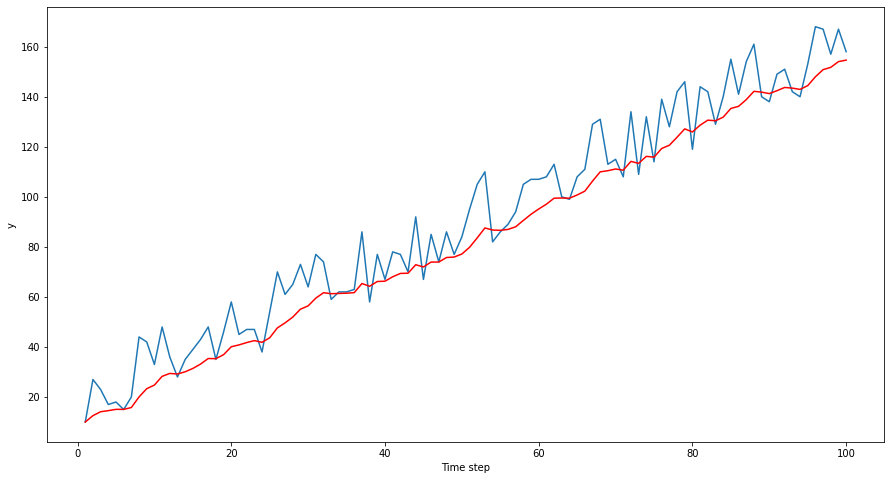

In [5]:
plt.figure(figsize=(15, 8))
plt.plot('y', data = data_series)
plt.plot('smoothed_data', data = data_series, color = 'red')
plt.xlabel('Time step')
plt.ylabel('y')
plt.show

Вывод 44 строки с полученным результатом

In [6]:
data_series.loc[[44]]

,y,smoothed_data
44,92,72.85861


Вывод только значения только на 44 строке после экспоненциального сглаживания.

In [7]:
y_44 = round(data_series['smoothed_data'].loc[[44]], 2)
y_44

44    72.86
Name: smoothed_data, dtype: float64

Выполнено экспоненциальное сглаживание с коэффициентом 0,15 посредством функции ewm, результат записан в столбец smoothed_data_ewm

In [8]:
data_series['smoothed_data_ewm'] = data_series['y'].ewm(alpha = 0.15, adjust = False).mean()
data_series

,y,smoothed_data,smoothed_data_ewm
1,10,10.000000,10.000000
2,27,12.550000,12.550000
3,23,14.117500,14.117500
4,17,14.549875,14.549875
5,18,15.067394,15.067394
...,...,...,...
96,168,147.978953,147.978953
97,167,150.832110,150.832110
98,157,151.757293,151.757293
99,167,154.043699,154.043699


Визуализация фактических данных, а также  данных, полученных после экспоненциального сглаживания, с коэффициентом сглаживания 0,15 написанной функции smooth_data_exponentially и функции ewm.

<function matplotlib.pyplot.show(*args, **kw)>

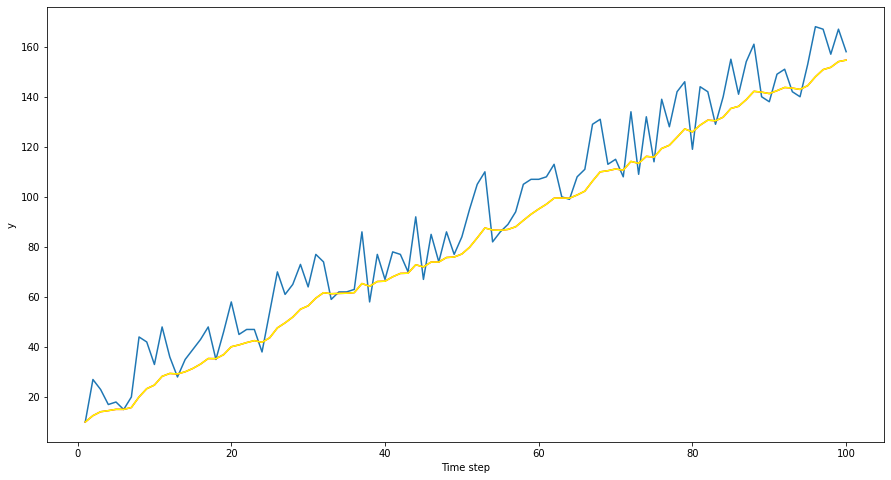

In [9]:
plt.figure(figsize=(15, 8))
plt.plot('y', data = data_series)
plt.plot('smoothed_data', data = data_series, color = 'red')
plt.plot('smoothed_data_ewm', data = data_series, color = 'yellow')
plt.xlabel('Time step')
plt.ylabel('y')
plt.show

Проверка насколько значения, полученные в ячейках smoothed_data и smoothed_data_ewm совпадают.


In [10]:
(data_series['smoothed_data'] == data_series['smoothed_data_ewm']).unique()

array([ True])

Преобразование типа данных в массив numpy. Отдельно запишем значения временного ряда и соответствующие ему временные метки.

In [11]:
x = data_series.index.to_numpy()
y = data_series['y'].to_numpy()
y

array([ 10,  27,  23,  17,  18,  15,  20,  44,  42,  33,  48,  36,  28,
        35,  39,  43,  48,  35,  46,  58,  45,  47,  47,  38,  54,  70,
        61,  65,  73,  64,  77,  74,  59,  62,  62,  63,  86,  58,  77,
        67,  78,  77,  70,  92,  67,  85,  74,  86,  77,  84,  95, 105,
       110,  82,  86,  89,  94, 105, 107, 107, 108, 113, 100,  99, 108,
       111, 129, 131, 113, 115, 108, 134, 109, 132, 114, 139, 128, 142,
       146, 119, 144, 142, 129, 140, 155, 141, 154, 161, 140, 138, 149,
       151, 142, 140, 153, 168, 167, 157, 167, 158])

В ячейку poly записано уравнение линейного тренда

In [12]:
poly = np.polyfit(x,y,1)
poly

array([ 1.45405341, 17.35030303])

Присвоение значений в переменные a и b 

In [13]:
a = poly[0]
b = poly[1]


Поиск значений ряда, за счёт использования линии тренда

In [14]:
x = np.arange(1, 101)
data_series['linear_trend'] = a * x + b
data_series

,y,smoothed_data,smoothed_data_ewm,linear_trend
1,10,10.000000,10.000000,18.804356
2,27,12.550000,12.550000,20.258410
3,23,14.117500,14.117500,21.712463
4,17,14.549875,14.549875,23.166517
5,18,15.067394,15.067394,24.620570
...,...,...,...,...
96,168,147.978953,147.978953,156.939430
97,167,150.832110,150.832110,158.393483
98,157,151.757293,151.757293,159.847537
99,167,154.043699,154.043699,161.301590


Построение графика исходного ряда и линии тренда

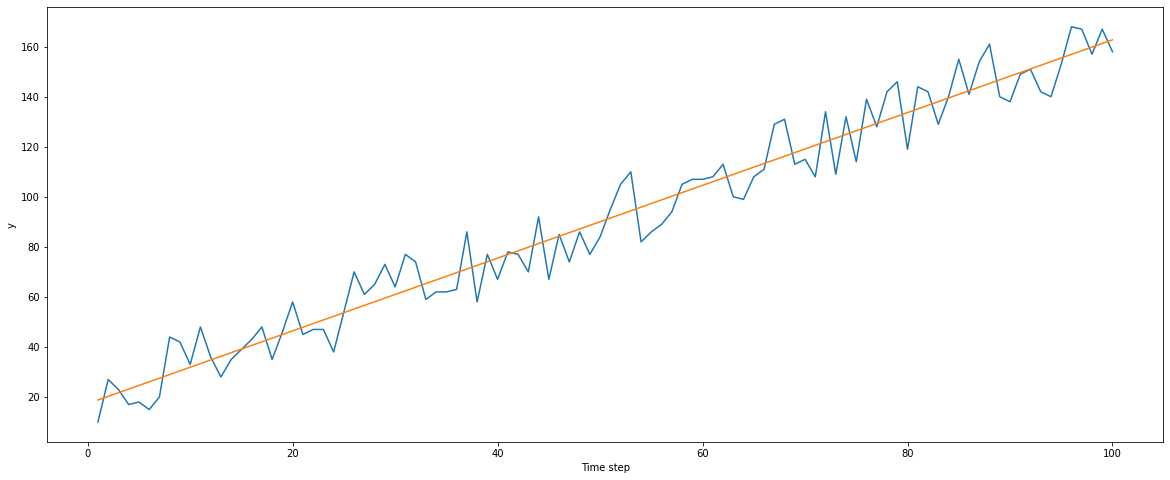

In [15]:
plt.figure(figsize=(20, 8))
plt.plot('y', data=data_series)
plt.plot('linear_trend', data=data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Вычисление коэффициента детерминации R^2. Для этого выполним поиск надостающих значений, а именно fi и y_avg.

In [17]:
fi = data_series['linear_trend']
y_avg = data_series['y'].mean()


90.78

In [21]:
R_squared = 1 - (((y - fi) ** 2).sum() / ((y - y_avg) ** 2).sum())
round(R_squared, 2)

0.96

Прогноз на 101 элемент, полученное значение записано в ячейку y_101


In [23]:
y_101 = a * 101 + b
round(y_101, 2)

164.21